## 1. Naložitev podatkov

Zajela sem podatke: id, uvrstitev, naslov, avtorja, leto, oceno, število prejetih nagrad za knjigo, število kritik, število bralcev knjige, žanr 1 in žanr 2 (izbira uporabnika, za kakšn žanr gre).

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 5)
pd.options.display.max_rows = 15
pd.set_option('display.float_format', lambda x: '%.2f' % x)

knjige = pd.read_csv('knjige.csv', encoding = 'utf-8')
knjige

,id,uvrstitev,naslov,avtor,leto,žanr1,žanr2,ocena,nagrade,kritike,bralci
0,1000718,1243,The Day of the Scorpion,Paul Scott,1968,Historical Fiction,Fiction,4.31,0,77,1104
1,1000724,976,The Towers of Silence,Paul Scott,1971,Fiction,Historical Fiction,4.29,0,65,969
2,1000751,797,"Pollyanna (Pollyanna, #1)",Eleanor H. Porter,1912,Classics,Childrens,3.94,0,1332,58079
3,10009,844,Homo Faber,Max Frisch,1957,Classics,Fiction,3.75,0,307,11363
4,10033,728,Being and Nothingness,Jean-Paul Sartre,1943,Philosophy,Nonfiction,3.94,0,302,20279
5,10034,557,The Age of Reason,Jean-Paul Sartre,1945,Philosophy,Fiction,3.96,0,344,8730
6,100365,1052,The Mote in God's Eye,Larry Niven,1974,Science Fiction,Fiction,4.06,3,1270,50275
...,...,...,...,...,...,...,...,...,...,...,...
1486,98969,1115,The First Circle,Aleksandr Solzhenitsyn,1968,Fiction,Cultural,4.18,0,289,5801
1487,99107,104,"Winnie-the-Pooh (Winnie-the-Pooh, #1)",A.A. Milne,1926,Childrens,Fiction,4.33,1,2826,209533


## 2. Osnovna analiza

Iz seznama sem zajela podatke prvih 1500 knjig, a nekaj (7) jih je bilo podvojenih, saj so lahko uporabniki goodreadsa poljubno dodajali knjige na seznam. Te sem odstranila pred zapisom csv tabele.

In [2]:
stevilo_knjig = len(knjige)
stevilo_knjig

1493

Razpredelnica glede na uvrstitev na seznamu:

In [5]:
knjige.sort_values('uvrstitev')

,id,uvrstitev,naslov,avtor,leto,žanr1,žanr2,ocena,nagrade,kritike,bralci
560,2657,1,To Kill a Mockingbird,Harper Lee,1960,Classics,Historical Fiction,4.25,4,69697,3213907
1059,5470,2,1984,George Orwell,1949,Science Fiction,Literature,4.13,2,41357,1925362
685,33,3,"The Lord of the Rings (The Lord of the Rings, ...",J.R.R. Tolkien,1955,Fantasy,Classics,4.47,5,9046,417627
926,4671,4,The Great Gatsby,F. Scott Fitzgerald,1925,Classics,Literature,3.88,1,50004,2640795
626,3,5,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1997,Fantasy,Young Adult,4.43,25,69416,4483632
1259,7613,6,Animal Farm,George Orwell,1945,Classics,Science Fiction,3.86,2,32875,1906373
956,48855,7,The Diary of a Young Girl,Anne Frank,1947,Nonfiction,Classics,4.09,1,19738,1961416
1103,5907,8,The Hobbit,J.R.R. Tolkien,1937,Fantasy,Classics,4.24,3,36355,2113685
991,578651,9,The Catcher in the Rye,J.D. Salinger,1951,Classics,Fiction,3.79,2,42989,2023843
343,17470674,10,Fahrenheit 451,Ray Bradbury,1953,Classics,Science Fiction,3.97,4,28601,1115505


Poglejmo povprečno oceno in povprečno število bralcev na uvrščeno knjigo.

In [6]:
povprecna_ocena = sum(knjige['ocena']) / stevilo_knjig
print ("%.2f" % povprecna_ocena)

4.04


In [7]:
povprecno_stevilo_bralcev = sum(knjige['bralci']) / stevilo_knjig
print (int(round(povprecno_stevilo_bralcev)))

111036


Poglejmo si 10 najbolj branih knjig:

In [8]:
knjige.sort_values('bralci')[-10:]

,id,uvrstitev,naslov,avtor,leto,žanr1,žanr2,ocena,nagrade,kritike,bralci
972,5,21,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,1999,Fantasy,Young Adult,4.52,13,33537,1869573
1259,7613,6,Animal Farm,George Orwell,1945,Classics,Science Fiction,3.86,2,32875,1906373
1059,5470,2,1984,George Orwell,1949,Science Fiction,Literature,4.13,2,41357,1925362
956,48855,7,The Diary of a Young Girl,Anne Frank,1947,Nonfiction,Classics,4.09,1,19738,1961416
1465,960,163,"Angels & Demons (Robert Langdon, #1)",Dan Brown,2000,Fiction,Mystery,3.85,1,24540,1977880
991,578651,9,The Catcher in the Rye,J.D. Salinger,1951,Classics,Fiction,3.79,2,42989,2023843
1103,5907,8,The Hobbit,J.R.R. Tolkien,1937,Fantasy,Classics,4.24,3,36355,2113685
926,4671,4,The Great Gatsby,F. Scott Fitzgerald,1925,Classics,Literature,3.88,1,50004,2640795
560,2657,1,To Kill a Mockingbird,Harper Lee,1960,Classics,Historical Fiction,4.25,4,69697,3213907
626,3,5,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1997,Fantasy,Young Adult,4.43,25,69416,4483632


10 najslabše ocenjenih knjig:

In [9]:
knjige.sort_values('ocena')[:10]

,id,uvrstitev,naslov,avtor,leto,žanr1,žanr2,ocena,nagrade,kritike,bralci
1054,54270,742,Mein Kampf,Adolf Hitler,1925,History,Nonfiction,3.09,0,2124,21790
1016,5246,382,Ethan Frome,Edith Wharton,1911,Classics,Fiction,3.34,0,4017,76143
1029,5308,282,The Pearl,John Steinbeck,1947,Classics,Fiction,3.39,0,5785,138560
1033,531509,1193,Herland,Charlotte Perkins Gilman,1915,Fiction,Feminism,3.45,1,872,8747
1246,7437,333,Naked Lunch,William S. Burroughs,1959,Fiction,Classics,3.46,0,2636,59822
1124,606818,1212,"Holy Blood, Holy Grail",Michael Baigent,1982,Nonfiction,Religion,3.46,0,661,9906
1276,769658,1021,Battlefield Earth: A Saga of the Year 3000,L. Ron Hubbard,1982,Science Fiction,Fiction,3.47,6,950,13227
1414,91202,1405,Chariots of The Gods,Erich von Däniken,1968,History,Nonfiction,3.47,0,821,8956
348,17660,1180,The Tommyknockers,Stephen King,1987,Horror,Fiction,3.47,0,1758,91471
667,32067,310,Lady Chatterley's Lover,D.H. Lawrence,1928,Classics,Fiction,3.48,0,3616,71622


Knjige niso tako neznane, kot bi človek pričakoval. Zavedati se moramo, da so to še vedno najslabše ocenjene knjige med najboljšimi.

In [ ]:
Poglejmo si povprečno oceno knjig, razvrščenih glede na leto izdaje.

In [10]:
knjige_po_letih = knjige.groupby('leto')

In [11]:
knjige_po_letih['ocena'].mean()

leto
1789   4.11
1813   4.54
1839   3.91
1847   3.88
1853   3.50
1856   4.17
1889   4.25
1894   4.19
1900   3.99
1901   3.95
       ... 
1995   4.00
1996   4.08
1997   4.01
1998   4.04
1999   4.00
2000   3.98
2001   4.21
2003   4.06
2005   4.05
2007   3.93
Name: ocena, dtype: float64

In [12]:
knjige['desetletje'] = 10 * (knjige['leto'] // 10)
knjige_bralci_leto = knjige[['bralci','desetletje']]
knjige_po_desetletjih = knjige_bralci_leto.groupby('desetletje')
knjige_po_desetletjih.size()

desetletje
1780      1
1810      1
1830      1
1840      1
1850      2
1880      1
1890      2
1900     40
1910     40
1920     78
1930    106
1940    101
1950    162
1960    171
1970    195
1980    228
1990    321
2000     42
dtype: int64

Opazimo, da se nekateri bralci niso strogo držali omejitve, da naj bi knjige bile napisane v 20.stoletju. Največ knjig na seznamu je iz 90ih let.

Poglejmo si, kako je število bralcev odvisno obdobja, v katerem je bila knjiga izdana:

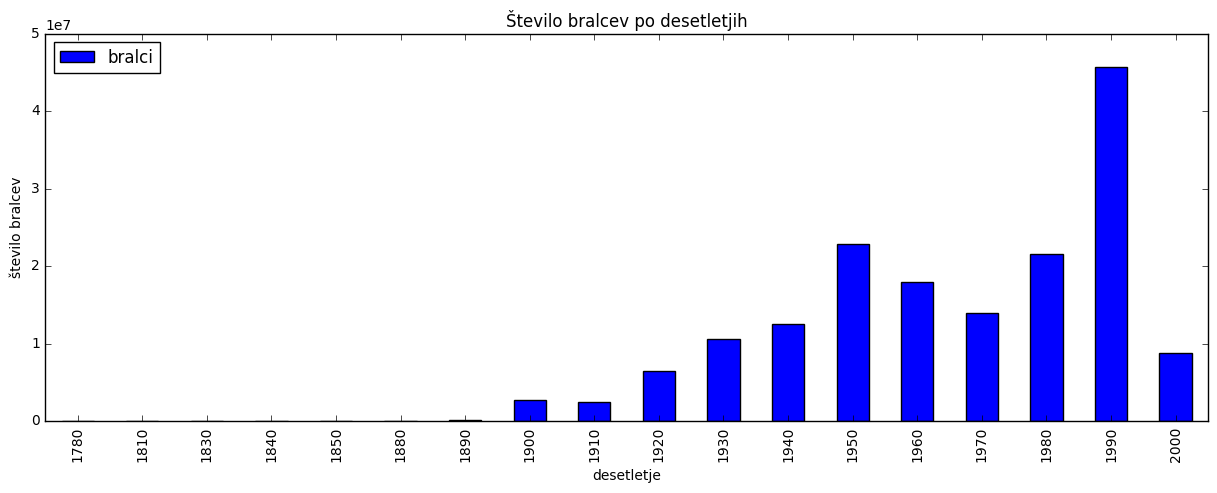

In [16]:
bralci = knjige_po_desetletjih.sum()
bralci.plot(kind='bar', title='Število bralcev po desetletjih').set_ylabel('število bralcev')

Kot pričakovano je največ uporabnikov bralo knjige iz 90ih, saj je iz tega obdobja tudi največ knjig na seznamu.

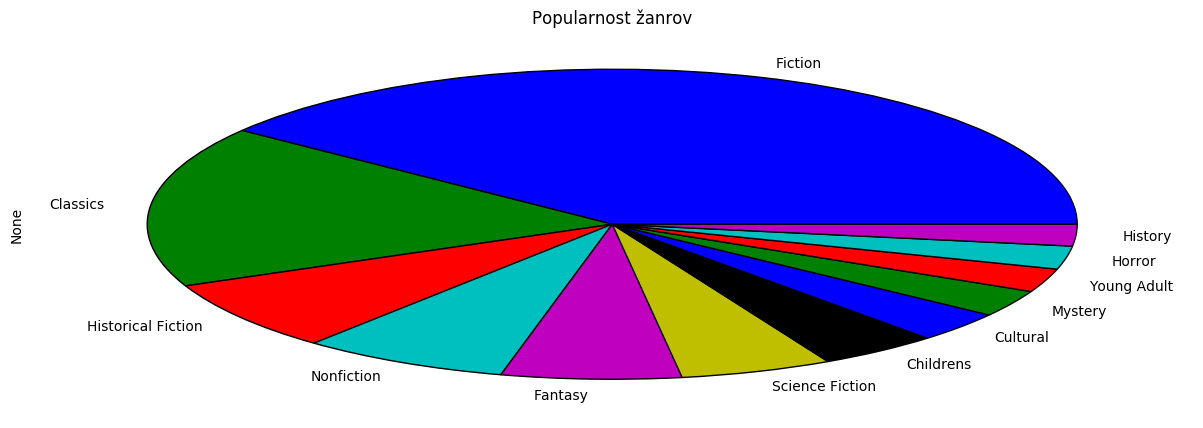

In [17]:
popularnost_žanrov = knjige[['žanr1', 'žanr2']].stack().value_counts()
popularnost_žanrov[popularnost_žanrov > 50].plot(kind='pie', title='Popularnost žanrov')

Leposlovje očitno prevladuje. Kateri so pa najbolj obskurni žanri?

In [19]:
popularnost_žanrov[-10:]

Dc Comics               1
Apocalyptic             1
Sports                  1
New York                1
Education               1
Academic                1
Gothic                  1
Death                   1
Realistic Fiction       1
North American Hi...    1
dtype: int64

Popolnoma nepresenetljivo. Oglejmo si razmerje med številom kritik in številom prejetih nagrad.

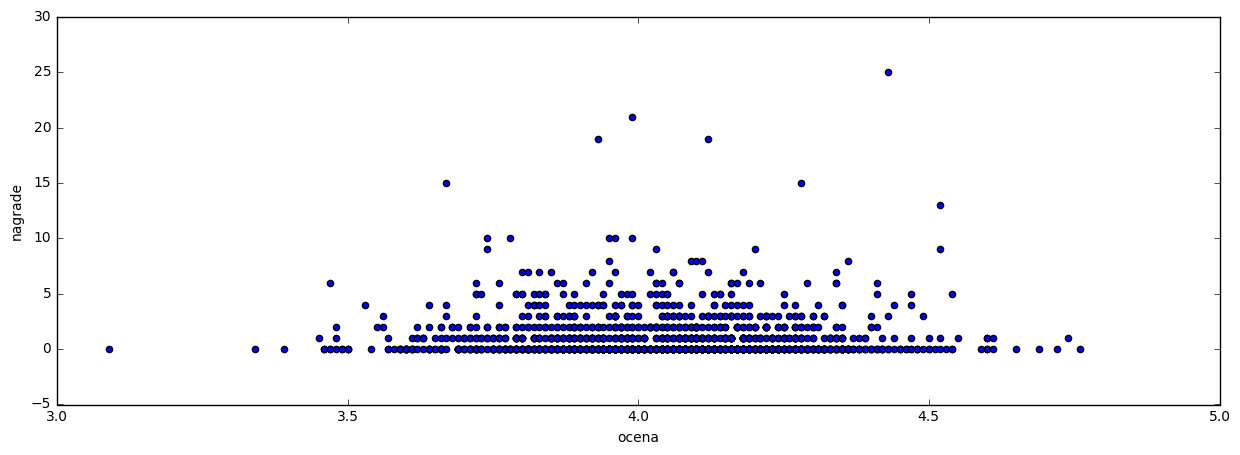

In [20]:
knjige.sort_values('ocena', ascending = True).plot(x = 'ocena', y = 'nagrade', kind='scatter')

Ocene so po pričakovanjih zgoščene in precej visoke, saj ponavadi bralci glasujejo za boljše knjige. Veliko knjig ni prejelo nobene nagrade. Število nagrad lepo narašča do ocene 4.0, in se potem lepo redči, najdemo le enega osamelca ki je očitno prejel zelo veliko (in tudi največje) število nagrad. Katera knjiga je to?

In [68]:
knjige.sort_values('nagrade').tail(1)

,id,uvrstitev,naslov,avtor,leto,žanr1,žanr2,ocena,nagrade,kritike,bralci,desetletje
625,3,5,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1997,Fantasy,Young Adult,4.43,25,69416,4483632,1990


,id,žanr
0,1000718,Historical Fiction
1,1000718,Fiction
2,1000718,Cultural
3,1000718,Historical
4,1000718,Literature
5,1000724,Fiction
6,1000724,Historical Fiction
7,1000724,Cultural
8,1000724,Historical
9,1000724,Literature


Poglejmo, kateri pisatelji, ki so se s svojimi knjigami uvrstil na seznam, so prejeli največ nagrad:

In [39]:
po_avtorjih = pd.DataFrame(knjige.groupby('avtor')['nagrade'].sum())
urejeno = po_avtorjih.sort_values('nagrade')[-10:].iloc[::-1]
urejeno

,nagrade
avtor,
J.K. Rowling,56
Roald Dahl,31
Lois Lowry,29
Stephen King,22
Kate DiCamillo,21
Margaret Atwood,20
Louis Sachar,19
Ursula K. Le Guin,18
Neal Stephenson,16


Spet J.K.Rowling. Ali objektivno tako izstopa med vsemi pisatelji 20. stoletja?
Poglejmo si natančnejše žanre za knjige (oz. vse žanre vsake knjige - prva dva v osnovni tabeli sta žanra, ki sta dobila naječ glasov pri opredelitvi knjige).

In [54]:
zanri = pd.read_csv('žanri.csv', encoding = 'utf-8')
zanri

,id,žanr
0,1000718,Historical Fiction
1,1000718,Fiction
2,1000718,Cultural
3,1000718,Historical
4,1000718,Literature
5,1000724,Fiction
6,1000724,Historical Fiction
7,1000724,Cultural
8,1000724,Historical
9,1000724,Literature


In [53]:
zdruzen = pd.merge(zanri, knjige, on='id')
zdruzen.drop(['žanr1', 'žanr2'],inplace=True,axis=1)
zdruzen

,id,žanr,uvrstitev,naslov,avtor,leto,ocena,nagrade,kritike,bralci
0,1000718,Historical Fiction,1243,The Day of the Scorpion,Paul Scott,1968,4.31,0,77,1104
1,1000718,Fiction,1243,The Day of the Scorpion,Paul Scott,1968,4.31,0,77,1104
2,1000718,Cultural,1243,The Day of the Scorpion,Paul Scott,1968,4.31,0,77,1104
3,1000718,Historical,1243,The Day of the Scorpion,Paul Scott,1968,4.31,0,77,1104
4,1000718,Literature,1243,The Day of the Scorpion,Paul Scott,1968,4.31,0,77,1104
5,1000724,Fiction,976,The Towers of Silence,Paul Scott,1971,4.29,0,65,969
6,1000724,Historical Fiction,976,The Towers of Silence,Paul Scott,1971,4.29,0,65,969
7,1000724,Cultural,976,The Towers of Silence,Paul Scott,1971,4.29,0,65,969
8,1000724,Historical,976,The Towers of Silence,Paul Scott,1971,4.29,0,65,969
9,1000724,Literature,976,The Towers of Silence,Paul Scott,1971,4.29,0,65,969
